# Testing the models (90-5-5)

In [2]:
import tensorflow as tf 
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

base_dir = r'tiles'
test_dir = os.path.join(base_dir, 'test')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory( test_dir, target_size=(1024, 1024), 
                                                  batch_size=9, class_mode='binary', shuffle=False)

from keras.models import load_model

import warnings
warnings.filterwarnings(action="ignore")


import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from collections import Counter
from math import pow

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')
    

/home/ign1/anaconda3/envs/pruebas/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ign1/anaconda3/envs/pruebas/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ign1/anaconda3/envs/pruebas/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ign1/anaconda3/envs/pruebas/lib/python3.7/s

Found 6556 images belonging to 2 classes.


# VGG-3

## 1

In [2]:
model = load_model('Models1/VGG3-1.h5')
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
test_loss, test_acc = model.evaluate_generator(test_generator, test_steps_per_epoch)
print('Test score: ', test_loss)    #Loss on test
print('Test accuracy: ', test_acc)







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Test score:  0.22552289152915317
Test accuracy:  0.9071079905237491


In [3]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
model.evaluate_generator(generator=test_generator, steps=test_steps_per_epoch)
test_generator.reset()

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch, verbose=0,use_multiprocessing=False,workers = 0)   #pickle_safe = True, workers = 1 
y_pred = np.rint(predictions)
Y_pred = predictions    

Y_pred_classes = y_pred
Y_true = test_generator.classes 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)

target_names = ['Road', 'No Road']

print(confusion_matrix(test_generator.classes, y_pred))
report = classification_report(test_generator.classes, y_pred,target_names=target_names, digits=4)
print(report)

['1-caminos', '2-noexiste']
[[4457  305]
 [ 304 1490]]
              precision    recall  f1-score   support

        Road     0.9361    0.9360    0.9360      4762
     No Road     0.8301    0.8305    0.8303      1794

    accuracy                         0.9071      6556
   macro avg     0.8831    0.8832    0.8832      6556
weighted avg     0.9071    0.9071    0.9071      6556



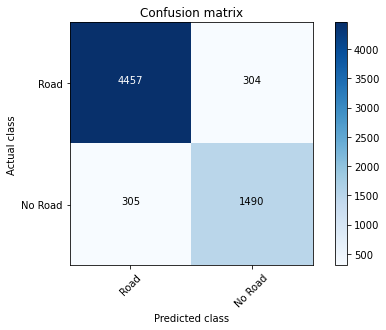

In [4]:
confusion_mtx= confusion_matrix(Y_pred_classes, Y_true)
plt.figure(figsize = (6.5,4.5))
plot_confusion_matrix(confusion_mtx, classes = ['Road', 'No Road'], cmap='Blues')

In [5]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(test_generator.classes, predictions)
roc_auc_score

0.9637803481388567

## 2

In [6]:
model = load_model('Models1/VGG3-2.h5')
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
test_loss, test_acc = model.evaluate_generator(test_generator, test_steps_per_epoch)
print('Test score: ', test_loss)    #Loss on test
print('Test accuracy: ', test_acc)

Test score:  0.2323412208255018
Test accuracy:  0.9064978646106513


In [7]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
model.evaluate_generator(generator=test_generator, steps=test_steps_per_epoch)
test_generator.reset()

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch, verbose=0,use_multiprocessing=False,workers = 0)   #pickle_safe = True, workers = 1 
y_pred = np.rint(predictions)
Y_pred = predictions    

Y_pred_classes = y_pred
Y_true = test_generator.classes 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)

target_names = ['Road', 'No Road']

print(confusion_matrix(test_generator.classes, y_pred))
report = classification_report(test_generator.classes, y_pred,target_names=target_names, digits=4)
print(report)

['1-caminos', '2-noexiste']
[[4556  206]
 [ 407 1387]]
              precision    recall  f1-score   support

        Road     0.9180    0.9567    0.9370      4762
     No Road     0.8707    0.7731    0.8190      1794

    accuracy                         0.9065      6556
   macro avg     0.8943    0.8649    0.8780      6556
weighted avg     0.9050    0.9065    0.9047      6556



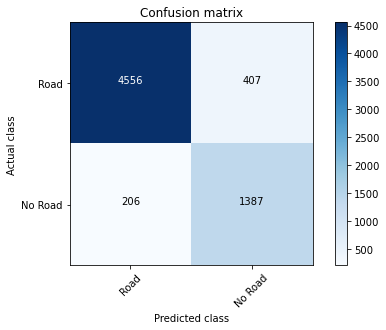

In [8]:
confusion_mtx= confusion_matrix(Y_pred_classes, Y_true)
plt.figure(figsize = (6.5,4.5))
plot_confusion_matrix(confusion_mtx, classes = ['Road', 'No Road'], cmap='Blues')

In [9]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(test_generator.classes, predictions)
roc_auc_score

0.9650708741678009

##  3

In [10]:
model = load_model('Models1/VGG3-3.h5')
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
test_loss, test_acc = model.evaluate_generator(test_generator, test_steps_per_epoch)
print('Test score: ', test_loss)    #Loss on test
print('Test accuracy: ', test_acc)

Test score:  0.21817843101628298
Test accuracy:  0.9092434415635792


In [11]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
model.evaluate_generator(generator=test_generator, steps=test_steps_per_epoch)
test_generator.reset()

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch, verbose=0,use_multiprocessing=False,workers = 0)   #pickle_safe = True, workers = 1 
y_pred = np.rint(predictions)
Y_pred = predictions    

Y_pred_classes = y_pred
Y_true = test_generator.classes 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)

target_names = ['Road', 'No Road']

print(confusion_matrix(test_generator.classes, y_pred))
report = classification_report(test_generator.classes, y_pred,target_names=target_names, digits=4)
print(report)

['1-caminos', '2-noexiste']
[[4490  272]
 [ 323 1471]]
              precision    recall  f1-score   support

        Road     0.9329    0.9429    0.9379      4762
     No Road     0.8439    0.8200    0.8318      1794

    accuracy                         0.9092      6556
   macro avg     0.8884    0.8814    0.8848      6556
weighted avg     0.9086    0.9092    0.9088      6556



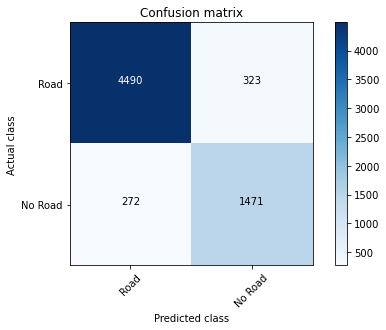

In [12]:
confusion_mtx= confusion_matrix(Y_pred_classes, Y_true)
plt.figure(figsize = (6.5,4.5))
plot_confusion_matrix(confusion_mtx, classes = ['Road', 'No Road'], cmap='Blues')

In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(test_generator.classes, predictions)
roc_auc_score

0.9667576297303484

# VGG-5

## 1

In [14]:
model = load_model('Models1/VGG5-1.h5')
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
test_loss, test_acc = model.evaluate_generator(test_generator, test_steps_per_epoch)
print('Test score: ', test_loss)    #Loss on test
print('Test accuracy: ', test_acc) 

Test score:  0.23451139186420478
Test accuracy:  0.9066503943649278


In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
model.evaluate_generator(generator=test_generator, steps=test_steps_per_epoch)
test_generator.reset()

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch, verbose=0,use_multiprocessing=False,workers = 0)   #pickle_safe = True, workers = 1 
y_pred = np.rint(predictions)
Y_pred = predictions    

Y_pred_classes = y_pred
Y_true = test_generator.classes 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)

target_names = ['Road', 'No Road']

print(confusion_matrix(test_generator.classes, y_pred))
report = classification_report(test_generator.classes, y_pred,target_names=target_names, digits=4)
print(report)

['1-caminos', '2-noexiste']
[[4497  265]
 [ 347 1447]]
              precision    recall  f1-score   support

        Road     0.9284    0.9444    0.9363      4762
     No Road     0.8452    0.8066    0.8254      1794

    accuracy                         0.9067      6556
   macro avg     0.8868    0.8755    0.8809      6556
weighted avg     0.9056    0.9067    0.9060      6556



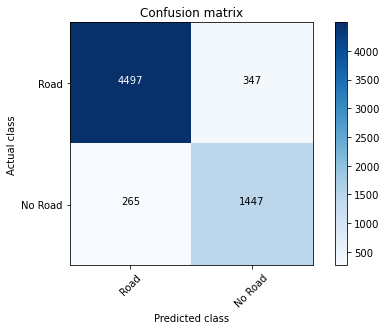

In [16]:
confusion_mtx= confusion_matrix(Y_pred_classes, Y_true)
plt.figure(figsize = (6.5,4.5))
plot_confusion_matrix(confusion_mtx, classes = ['Road', 'No Road'], cmap='Blues')

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(test_generator.classes, predictions)
roc_auc_score

0.9638629886265151

## 2

In [18]:
model = load_model('Models1/VGG5-2.h5')
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
test_loss, test_acc = model.evaluate_generator(test_generator, test_steps_per_epoch)
print('Test score: ', test_loss)    #Loss on test
print('Test accuracy: ', test_acc) 

Test score:  0.23604880223161193
Test accuracy:  0.9109212950990286


In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
model.evaluate_generator(generator=test_generator, steps=test_steps_per_epoch)
test_generator.reset()

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch, verbose=0,use_multiprocessing=False,workers = 0)   #pickle_safe = True, workers = 1 
y_pred = np.rint(predictions)
Y_pred = predictions    

Y_pred_classes = y_pred
Y_true = test_generator.classes 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)

target_names = ['Road', 'No Road']

print(confusion_matrix(test_generator.classes, y_pred))
report = classification_report(test_generator.classes, y_pred,target_names=target_names, digits=4)
print(report)

['1-caminos', '2-noexiste']
[[4518  244]
 [ 340 1454]]
              precision    recall  f1-score   support

        Road     0.9300    0.9488    0.9393      4762
     No Road     0.8563    0.8105    0.8328      1794

    accuracy                         0.9109      6556
   macro avg     0.8932    0.8796    0.8860      6556
weighted avg     0.9098    0.9109    0.9101      6556



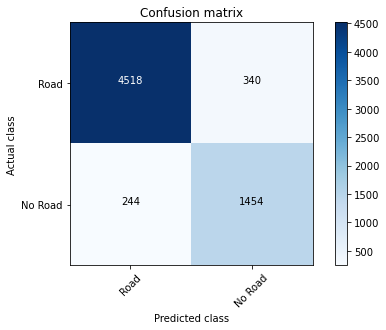

In [20]:
confusion_mtx= confusion_matrix(Y_pred_classes, Y_true)
plt.figure(figsize = (6.5,4.5))
plot_confusion_matrix(confusion_mtx, classes = ['Road', 'No Road'], cmap='Blues')

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(test_generator.classes, predictions)
roc_auc_score

0.9663379892937258

## 3

In [22]:
model = load_model('Models1/VGG5-3.h5')
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
test_loss, test_acc = model.evaluate_generator(test_generator, test_steps_per_epoch)
print('Test score: ', test_loss)    #Loss on test
print('Test accuracy: ', test_acc) 

Test score:  0.22638215842512818
Test accuracy:  0.911073824853305


In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
model.evaluate_generator(generator=test_generator, steps=test_steps_per_epoch)
test_generator.reset()

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch, verbose=0,use_multiprocessing=False,workers = 0)   #pickle_safe = True, workers = 1 
y_pred = np.rint(predictions)
Y_pred = predictions    

Y_pred_classes = y_pred
Y_true = test_generator.classes 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)

target_names = ['Road', 'No Road']

print(confusion_matrix(test_generator.classes, y_pred))
report = classification_report(test_generator.classes, y_pred,target_names=target_names, digits=4)
print(report)

['1-caminos', '2-noexiste']
[[4518  244]
 [ 339 1455]]
              precision    recall  f1-score   support

        Road     0.9302    0.9488    0.9394      4762
     No Road     0.8564    0.8110    0.8331      1794

    accuracy                         0.9111      6556
   macro avg     0.8933    0.8799    0.8862      6556
weighted avg     0.9100    0.9111    0.9103      6556



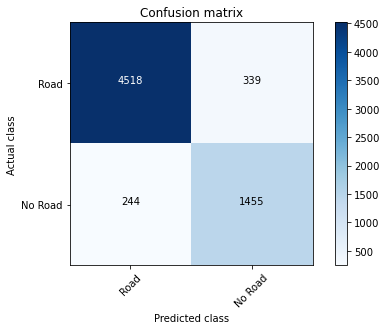

In [24]:
confusion_mtx= confusion_matrix(Y_pred_classes, Y_true)
plt.figure(figsize = (6.5,4.5))
plot_confusion_matrix(confusion_mtx, classes = ['Road', 'No Road'], cmap='Blues')

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(test_generator.classes, predictions)
roc_auc_score

0.9663790169012673

# VGG-from-scratch
## 1

In [27]:
model = load_model('Models1/vgg16_noweights-1.h5')
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
test_loss, test_acc = model.evaluate_generator(test_generator, test_steps_per_epoch)
print('Test score: ', test_loss)    #Loss on test
print('Test accuracy: ', test_acc) 

Test score:  0.22718421822726717
Test accuracy:  0.9025320301129005


In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
model.evaluate_generator(generator=test_generator, steps=test_steps_per_epoch)
test_generator.reset()

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch, verbose=0,use_multiprocessing=False,workers = 0)   #pickle_safe = True, workers = 1 
y_pred = np.rint(predictions)
Y_pred = predictions    

Y_pred_classes = y_pred
Y_true = test_generator.classes 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)

target_names = ['Road', 'No Road']

print(confusion_matrix(test_generator.classes, y_pred))
report = classification_report(test_generator.classes, y_pred,target_names=target_names, digits=4)
print(report)

['1-caminos', '2-noexiste']
[[4542  220]
 [ 419 1375]]
              precision    recall  f1-score   support

        Road     0.9155    0.9538    0.9343      4762
     No Road     0.8621    0.7664    0.8114      1794

    accuracy                         0.9025      6556
   macro avg     0.8888    0.8601    0.8729      6556
weighted avg     0.9009    0.9025    0.9007      6556



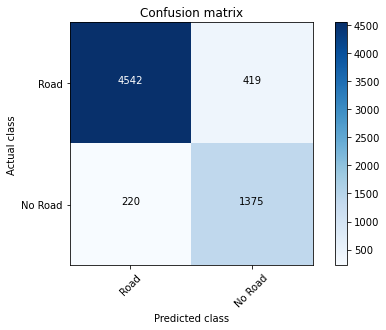

In [29]:
confusion_mtx= confusion_matrix(Y_pred_classes, Y_true)
plt.figure(figsize = (6.5,4.5))
plot_confusion_matrix(confusion_mtx, classes = ['Road', 'No Road'], cmap='Blues')

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(test_generator.classes, predictions)
roc_auc_score

0.9619576337570238

## 2

In [31]:
model = load_model('Models1/vgg16_noweights-2.h5')
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
test_loss, test_acc = model.evaluate_generator(test_generator, test_steps_per_epoch)
print('Test score: ', test_loss)    #Loss on test
print('Test accuracy: ', test_acc) 

Test score:  0.2315617909084192
Test accuracy:  0.903447222598738


In [32]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
model.evaluate_generator(generator=test_generator, steps=test_steps_per_epoch)
test_generator.reset()

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch, verbose=0,use_multiprocessing=False,workers = 0)   #pickle_safe = True, workers = 1 
y_pred = np.rint(predictions)
Y_pred = predictions    

Y_pred_classes = y_pred
Y_true = test_generator.classes 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)

target_names = ['Road', 'No Road']

print(confusion_matrix(test_generator.classes, y_pred))
report = classification_report(test_generator.classes, y_pred,target_names=target_names, digits=4)
print(report)

['1-caminos', '2-noexiste']
[[4593  169]
 [ 464 1330]]
              precision    recall  f1-score   support

        Road     0.9082    0.9645    0.9355      4762
     No Road     0.8873    0.7414    0.8078      1794

    accuracy                         0.9034      6556
   macro avg     0.8978    0.8529    0.8717      6556
weighted avg     0.9025    0.9034    0.9006      6556



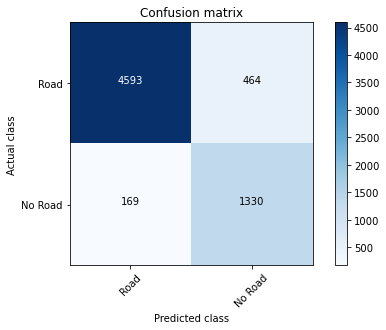

In [33]:
confusion_mtx= confusion_matrix(Y_pred_classes, Y_true)
plt.figure(figsize = (6.5,4.5))
plot_confusion_matrix(confusion_mtx, classes = ['Road', 'No Road'], cmap='Blues')

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(test_generator.classes, predictions)
roc_auc_score

0.963173771641624

## 3

In [3]:
model = load_model('Models1/vgg16_noweights-3.h5')
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
test_loss, test_acc = model.evaluate_generator(test_generator, test_steps_per_epoch)
print('Test score: ', test_loss)    #Loss on test
print('Test accuracy: ', test_acc) 








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Test score:  11.579871301155698
Test accuracy:  0.27364246492672434


In [4]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
model.evaluate_generator(generator=test_generator, steps=test_steps_per_epoch)
test_generator.reset()

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch, verbose=0,use_multiprocessing=False,workers = 0)   #pickle_safe = True, workers = 1 
y_pred = np.rint(predictions)
Y_pred = predictions    

Y_pred_classes = y_pred
Y_true = test_generator.classes 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)

target_names = ['Road', 'No Road']

print(confusion_matrix(test_generator.classes, y_pred))
report = classification_report(test_generator.classes, y_pred,target_names=target_names, digits=4)
print(report)

['1-caminos', '2-noexiste']
[[   0 4762]
 [   0 1794]]
              precision    recall  f1-score   support

        Road     0.0000    0.0000    0.0000      4762
     No Road     0.2736    1.0000    0.4297      1794

    accuracy                         0.2736      6556
   macro avg     0.1368    0.5000    0.2149      6556
weighted avg     0.0749    0.2736    0.1176      6556



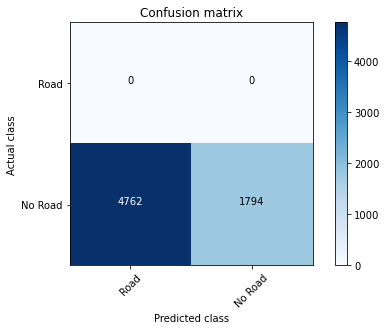

In [5]:
confusion_mtx= confusion_matrix(Y_pred_classes, Y_true)
plt.figure(figsize = (6.5,4.5))
plot_confusion_matrix(confusion_mtx, classes = ['Road', 'No Road'], cmap='Blues')

In [6]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(test_generator.classes, predictions)
roc_auc_score

0.5